### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import plotly.express as px


### Reading the csv file

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
df.info() # check the dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# check if there's any missing and nan values
df.isnull().sum() 

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### EDA 

In [6]:
df.describe().T # some outliers

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [7]:
# Selecting only numerical columns
X = df.select_dtypes('number').copy()
X.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

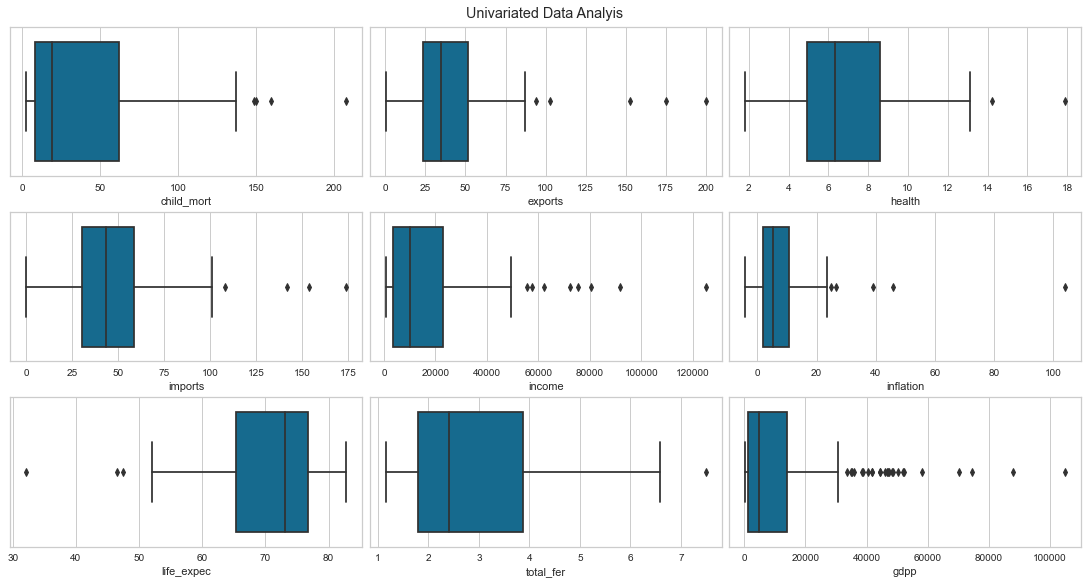

In [8]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
for x, i in enumerate(X):
    sns.boxplot(x=df[i], ax=ax[x])
    

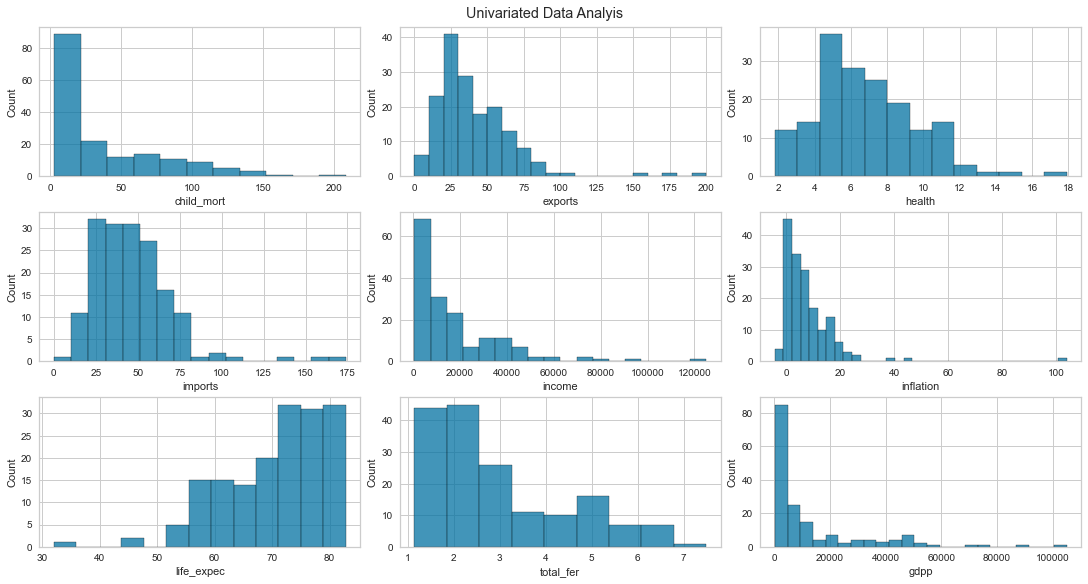

In [9]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
for x, i in enumerate(X):
    sns.histplot(x=df[i], ax=ax[x])
    

### OBSERVATION

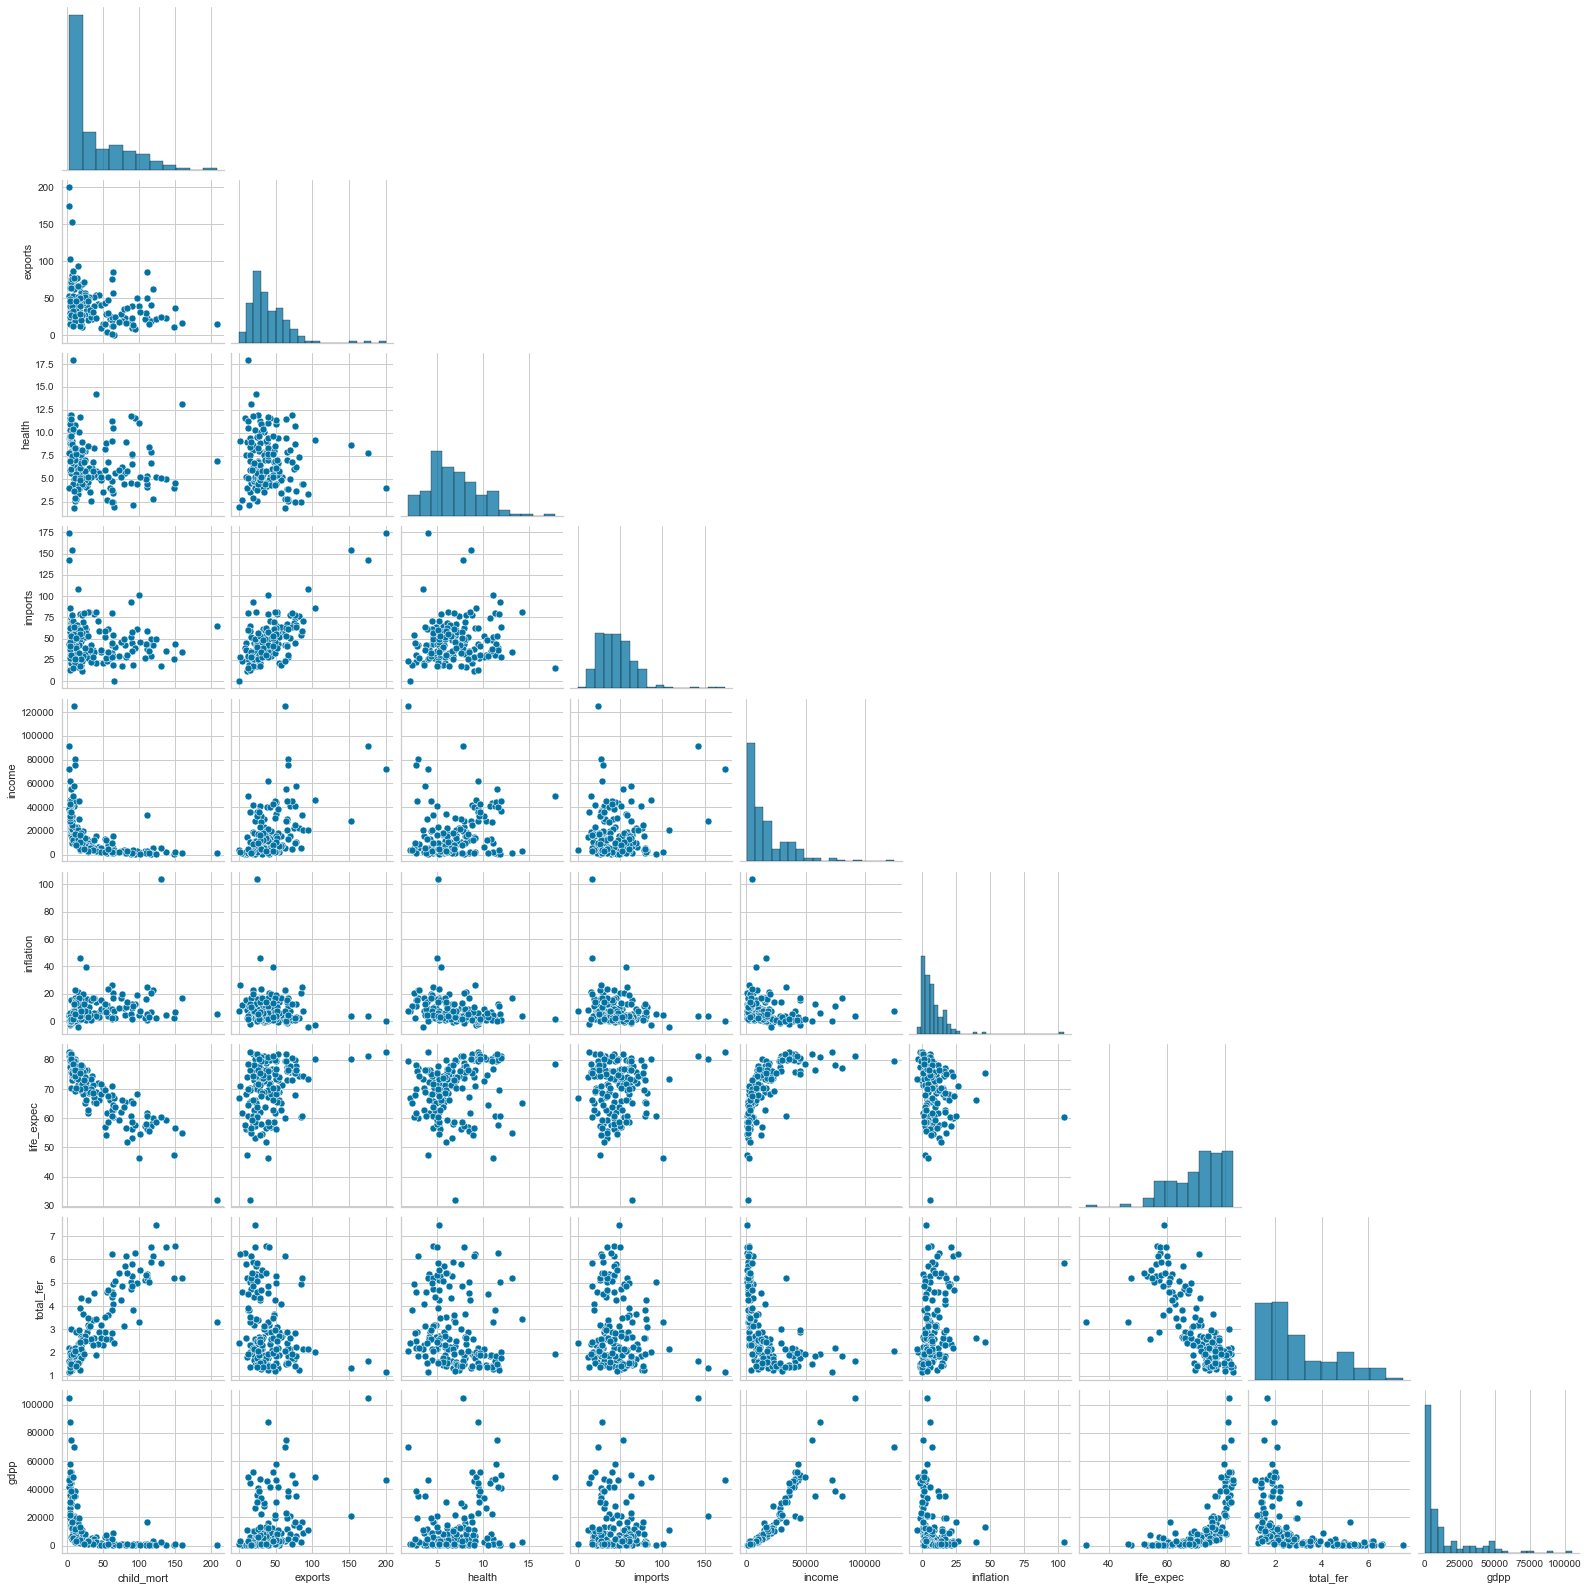

In [10]:
sns.pairplot(data=df, corner=True)

Analysis: There's some postivite and negative proportionalitys or relationships betweens some features. <br>
Lets dive into the correlation matrix to find some similiarities.

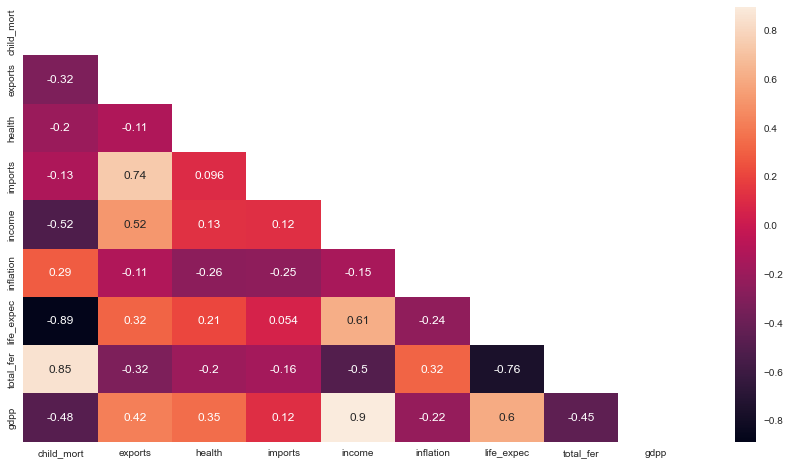

In [11]:
plt.figure(figsize=(15,8))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, mask = matrix)
plt.show()

* Child_mort has negative relationship with GDP 
* Export, income has postivite relationship with GDP.
* Total_fer and child_mort has postive relationship.
* total_fer and life_expec has negative relationship.
* life_expec and child_mort has negative relationship.

In [12]:
data = pd.read_csv('data-dictionary.csv')
data

Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...

# Data preparation

In [13]:
# DataFrame contaning only numerical values
X.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

### Set up pipeline with PCA

In [14]:
scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

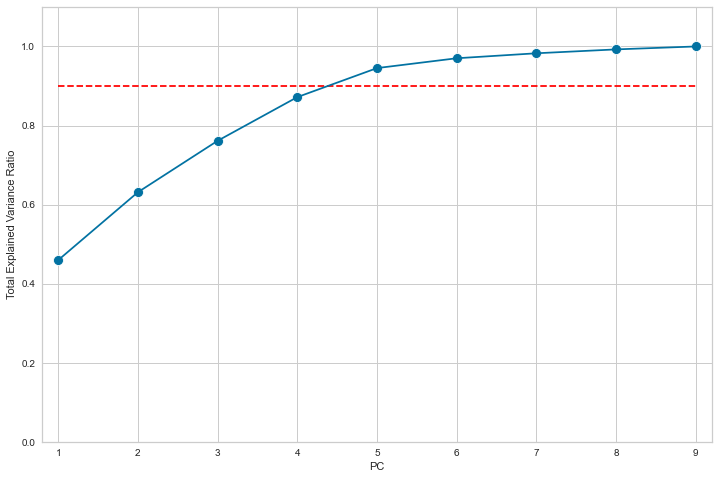

In [15]:
explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='red', linestyle='--')
plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.show()

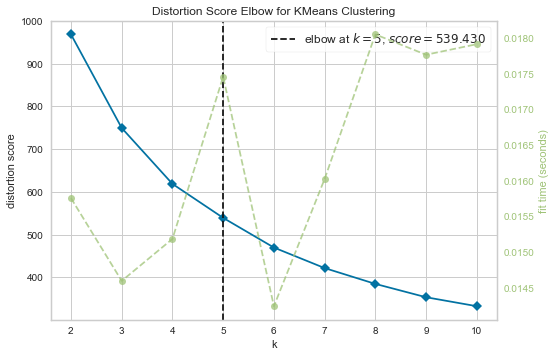

In [16]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KElbowVisualizer(KMeans())
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)
pipe[2].show()
plt.show()

In [17]:
dfcopy = df.copy()

In [18]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans(n_clusters=4)
pipe = make_pipeline(scaler, decomp, cluster)
pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=4))])

In [19]:
# Merge the PCA ratios into the DataFrame 
values = pipe[:2].transform(X)


pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
dfcopy = dfcopy.join(pd.DataFrame(values, columns=pca_labels))
dfcopy['clusters'] = pipe['kmeans'].labels_

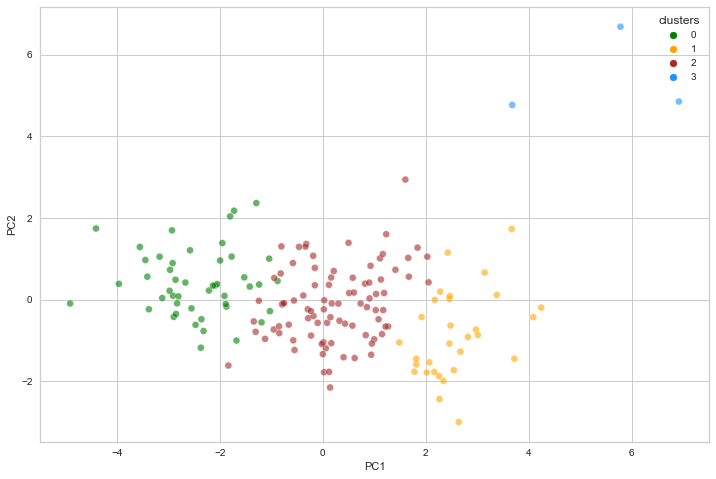

In [20]:
# display PC1 and PC2 
plt.figure(figsize=(12,8))
sns.scatterplot(data=dfcopy, x='PC1', y='PC2', hue='clusters', 
                alpha=.6, palette=['green','orange','brown','dodgerblue'] )
plt.show()



### Visualizing elbow without PCA 

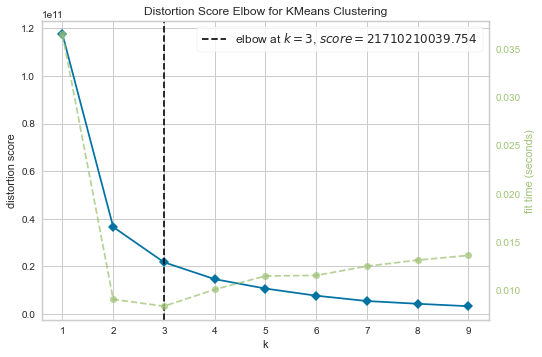

In [21]:
cluster = KMeans()

visualizer = KElbowVisualizer(cluster, k=(1,10))

visualizer.fit(X) # fit the data to the visualizer
visualizer.show()
plt.show()

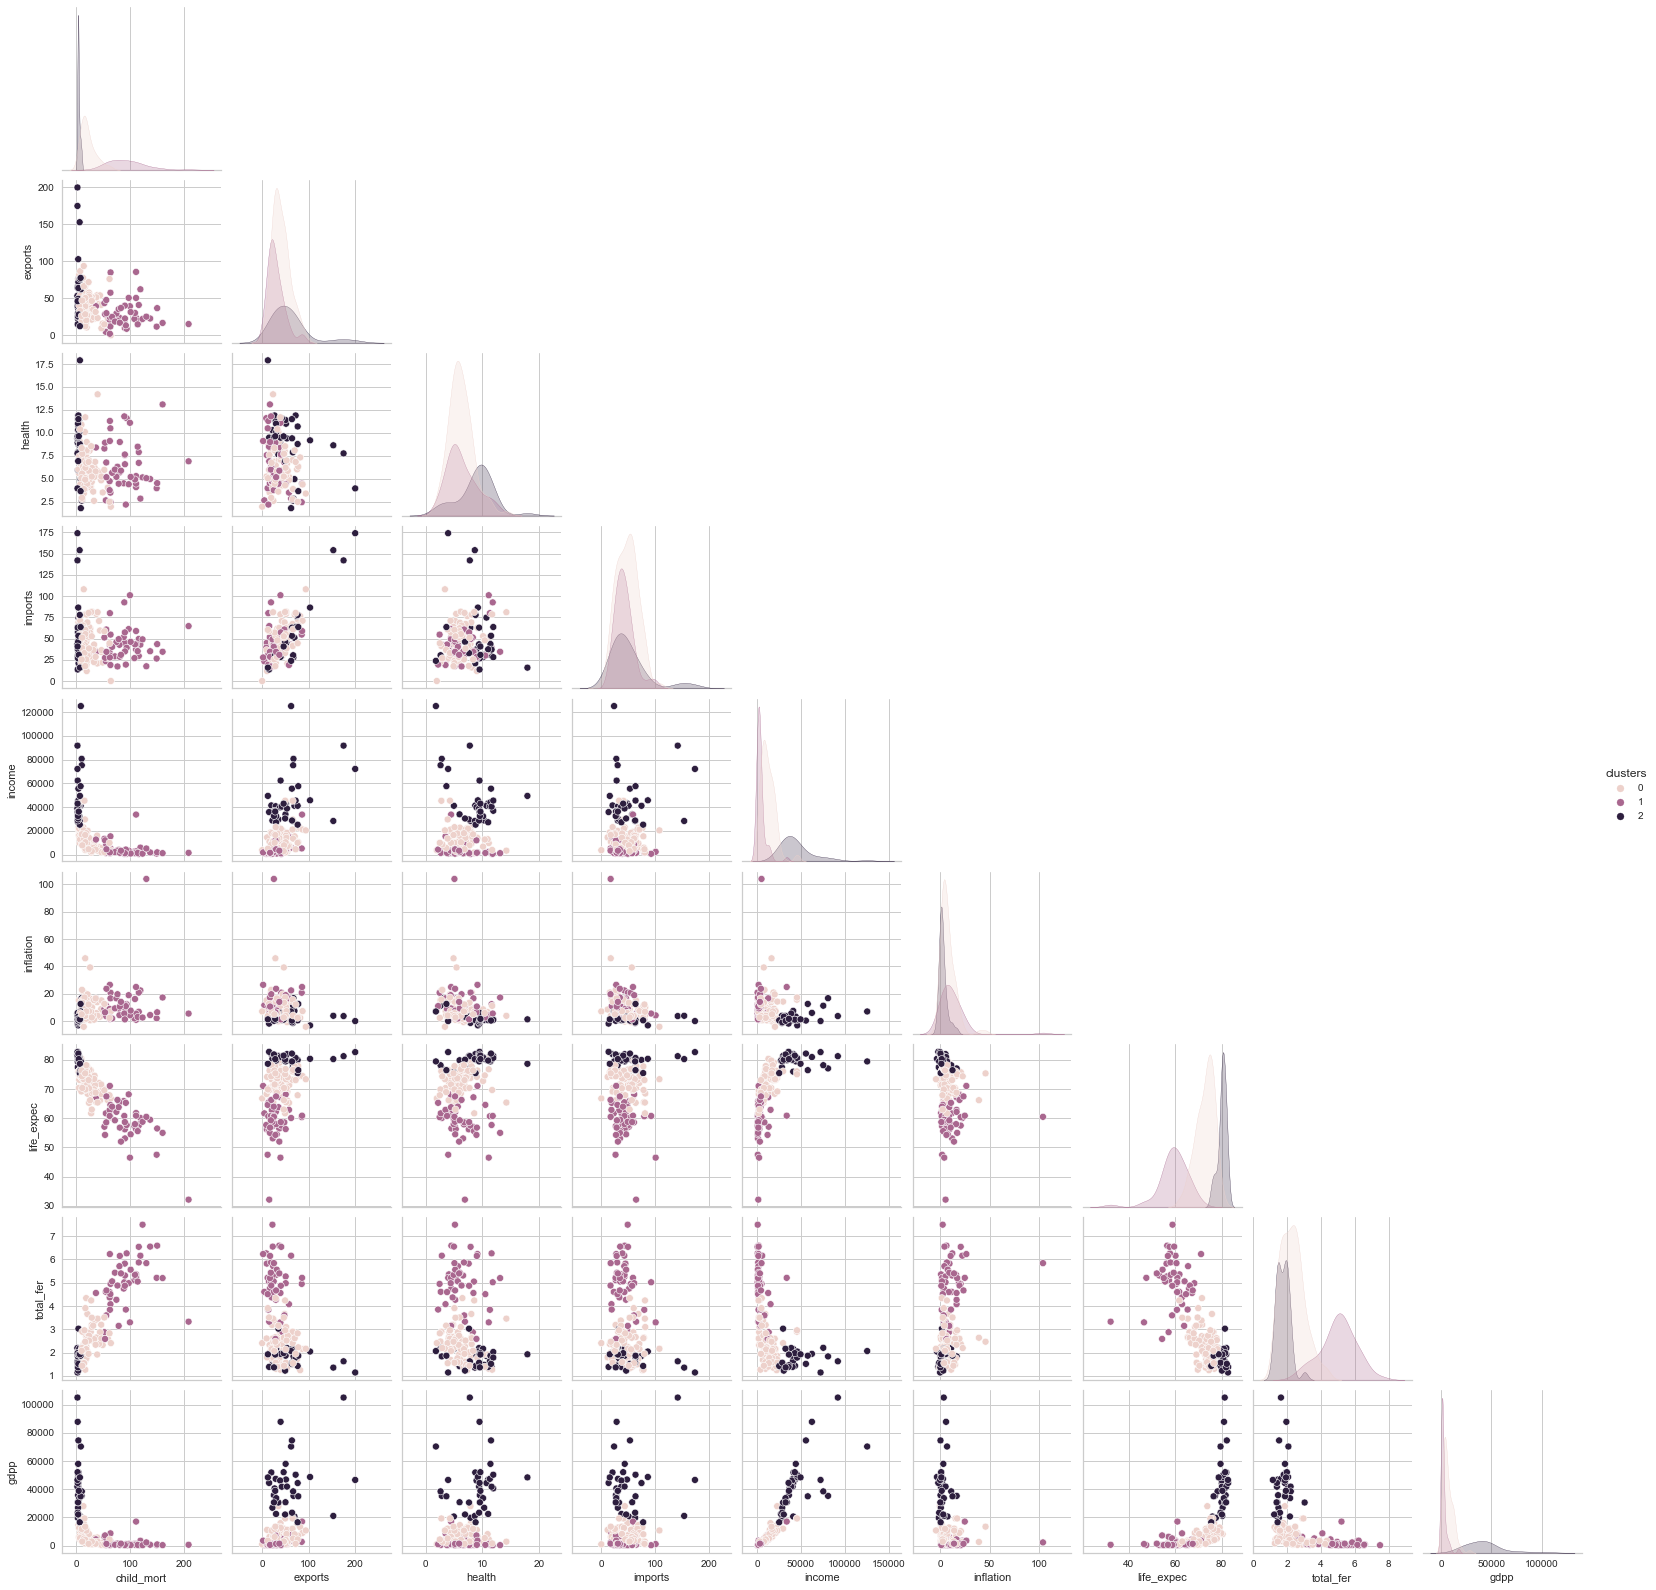

In [22]:
# creating a pipe, and scaling the values with k = 3 (number of clusters)
pipe = make_pipeline(StandardScaler(), KMeans(n_clusters = 3))
                     
# fit the data to the model
pipe.fit(X)

# add the clusters to the DataFrame 
df['clusters'] = pipe['kmeans'].labels_

# display the clusters in a pairplot
sns.pairplot(df, hue='clusters', corner=True)
plt.show()

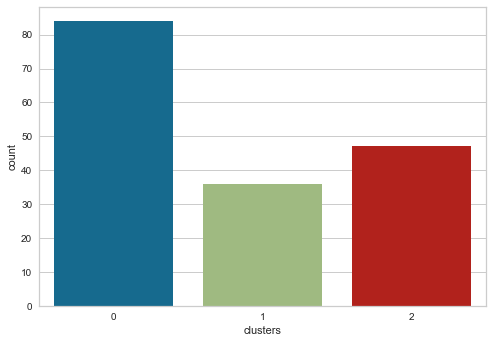

In [23]:
pipe = make_pipeline(StandardScaler(), KMeans(3))
pipe.fit(X)
df['clusters'] = pipe['kmeans'].labels_

sns.countplot(data=df, x='clusters')

plt.show()


In [24]:
pipe = make_pipeline(StandardScaler(), KMeans(3))
pipe.fit(X)
df['clusters'] = pipe['kmeans'].labels_

### Recategorize label names

In [25]:
category = {0 : 'No help needed', 2 : 'Need help', 1: 'Might need help'}

df['clusters'] = df['clusters'].map(category)

In [26]:
gp = df.groupby('clusters')[['country']].count().sort_values(by='country', ascending=True).reset_index()
gp

clusters  country
0   No help needed       36
1        Need help       47
2  Might need help       84

In [27]:
lst = ['Need help', 'No help needed' ,'Might need help']

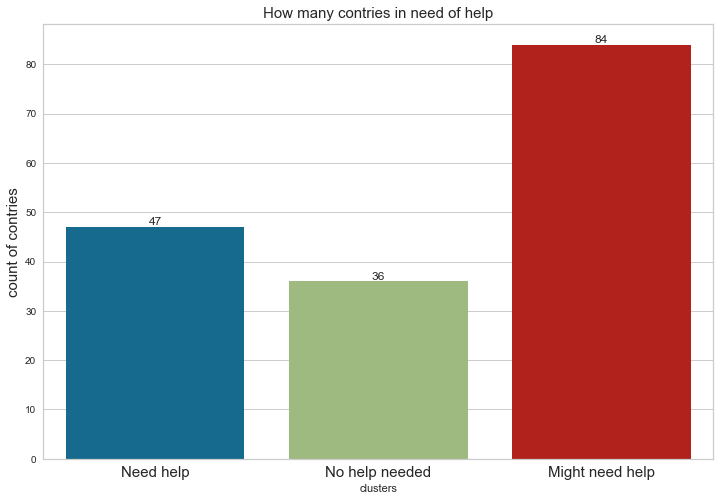

In [28]:
# displaying the clusters
plt.figure(figsize=(12,8))
ax = sns.barplot(x='clusters', y='country', data=gp, order = lst)
ax.bar_label(ax.containers[0])

# fixing title, fontsize
plt.title('How many contries in need of help',fontsize=15)
plt.ylabel('count of contries', fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [29]:
df.groupby(['clusters','country']).mean()

child_mort  exports  health  imports  \
clusters        country                                                      
Might need help Albania                     16.6     28.0    6.55     48.6   
                Algeria                     27.3     38.4    4.17     31.4   
                Antigua and Barbuda         10.3     45.5    6.03     58.9   
                Argentina                   14.5     18.9    8.10     16.0   
                Armenia                     18.1     20.8    4.40     45.3   
...                                          ...      ...     ...      ...   
No help needed  Sweden                       3.0     46.2    9.63     40.7   
                Switzerland                  4.5     64.0   11.50     53.3   
                United Arab Emirates         8.6     77.7    3.66     63.6   
                United Kingdom               5.2     28.2    9.64     30.8   
                United States                7.3     12.4   17.90     15.8   

                                       income  inflation  life_expec  \
clusters        country                                                
Might need help Albania                9930.0      4.490        76.3   
                Algeria               12900.0     16.100        76.5   
                Antigua and Barbuda   19100.0      1.440        76.8   
                Argentina             18700.0     20.900        75.8   
                Armenia                6700.0      7.770        73.3   
...                                       ...        ...         ...   
No help needed  Sweden                42900.0      0.991        81.5   
                Switzerland           55500.0      0.317        82.2   
                United Arab Emirates  57600.0     12.500        76.5   
                United Kingdom        36200.0      1.570        80.3   
                United States         49400.0      1.220        78.7   

                                      total_fer     gdpp  
clusters        country                                   
Might need help Albania                    1.65   4090.0  
                Algeria                    2.89   4460.0  
                Antigua and Barbuda        2.13  12200.0  
                Argentina                  2.37  10300.0  
                Armenia                    1.69   3220.0  
...                                         ...      ...  
No help needed  Sweden                     1.98  52100.0  
                Switzerland                1.52  74600.0  
                United Arab Emirates       1.87  35000.0  
                United Kingdom             1.92  38900.0  
                United States              1.93  48400.0  

[167 rows x 9 columns]

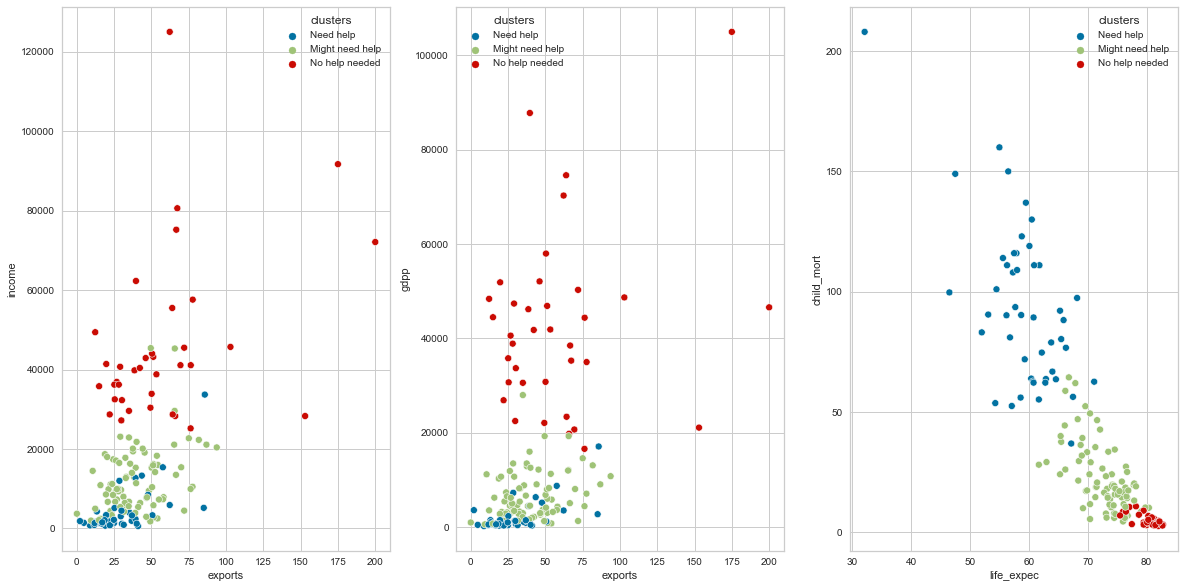

In [30]:

fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.scatterplot(data=df, x='exports', y='income', hue='clusters', ax=ax[0])
sns.scatterplot(data=df, x='exports', y='gdpp', hue='clusters', ax=ax[1])
sns.scatterplot(data=df, x='life_expec', y='child_mort', hue='clusters', ax=ax[2])
plt.show()

In [31]:
# show what countries that need help 
df[df['clusters']=='Need financial help']['country']


Series([], Name: country, dtype: object)

In [32]:
df[df['clusters']=='No help needed']['country']



7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

In [33]:
df[df['clusters']=='Might need help']['country']

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 84, dtype: object

## Lets visualize which countries need help on the map

In [34]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', 
              color = df['clusters'], 
              title = 'Countries that may need some help',
              color_discrete_map = {'No help needed':'#DB1C18',
                                    'Need help':'#DBDB3B',
                                    'Might need help':'#51A2DB'}, 
              projection='equirectangular')

In [35]:
px.choropleth(data_frame=df, locationmode='country names', 
              locations='country', 
              color=df['clusters'], 
              title='Asian countries that could need financial help',
              color_discrete_map = {'No help needed':'#DB1C18',
                                    'Need help':'#DBDB3B',
                                    'Might need help':'#51A2DB'},
             projection='equirectangular',
                scope='asia')




In [36]:
px.choropleth(data_frame=df, locationmode='country names', 
              locations='country', 
              color=df['clusters'], 
              title='African countries that could need financial help',
              color_discrete_map = {'No help needed':'#DB1C18',
                                    'Need help':'#DBDB3B',
                                    'Might need help':'#51A2DB'},
             projection='equirectangular',
                scope='africa')